In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',181)



In [2]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding='latin-1')

In [3]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [6]:
df=df.dropna(axis=1,how='any')

In [7]:
df=df.drop(['Orders.customer_id','Orders.fname','Orders.lname','Orders.order_number','Order_Items.parent'],axis=1)

In [8]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.product_name,Order_Items.qty,Order_Items.price
0,797,Christy,Dill,1426018724,1437764306,3758,USD,57.20,64.29,1,1426019099,5284,"Basic Rollators, Green",1,57.20
1,3,John,Smith,1386089139,1437764354,23,USD,20.00,29.99,1,1386090455,31,"Urinary Drain Bags,0.000",4,5.00
2,3,John,Smith,1386089139,1437764354,9531,USD,68.78,78.73,3,1449603652,11655,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78
3,4,James,Anderson,1386780263,1437762646,29,USD,19.56,29.55,1,1386780263,1816,Basket for 2-Button Walkers,1,19.56
4,5,Abraham,Pollak,1386861599,1437764316,30,USD,36.05,46.00,1,1386861599,40,Tens Units,1,36.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,1463408698,1463408698,17421,USD,14.85,16.06,0,1463408854,20186,"Medline Emesis/Barf Bags, throw up bags, Blue ...",1,14.85
4190,3732,Kennithe,Tecora,1463412756,1463412756,17425,USD,39.99,39.99,0,1463412757,20190,Medline Home Bed Assist Bar,1,39.99
4191,3733,Tinna,Randall,1463413245,1463413245,17426,USD,1099.00,989.10,5,1463413246,20191,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,1,1099.00
4192,3735,HALIMAH,SHAHID,1463416687,1463416687,17431,USD,129.99,129.99,0,1463416694,20196,"Standard Bariatric Heavy Duty Rollator, Burgun...",1,129.99


In [9]:
x=df[['Customers.id','Order_Items.qty','Orders.total']]

In [10]:
x=x.groupby('Customers.id',as_index=False).sum()

In [11]:
x.drop(['Customers.id'],axis=1,inplace=True)

In [12]:
model=KMeans(n_clusters=8)

In [13]:
eğit=model.fit(x)

In [14]:
sınıflandır=eğit.predict(x)

In [15]:
sınıflandır

array([0, 0, 0, ..., 5, 0, 0])

In [16]:
silhouette_score(x,sınıflandır)

0.7050430807677229

In [17]:
x['sınıf']=sınıflandır

In [18]:
x

,Order_Items.qty,Orders.total,sınıf
0,5,108.72,0
1,1,29.55,0
2,3,124.99,0
3,1,49.14,0
4,1,69.70,0
...,...,...,...
3049,1,16.06,0
3050,1,39.99,0
3051,1,989.10,5
3052,1,129.99,0


In [19]:
allscore=[]
allclusters=[]
def clust(clusters):
     for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(15)

Number of cluster2,silhouette0.9649282988190179
Number of cluster3,silhouette0.9324311403602837
Number of cluster4,silhouette0.8734641247895423
Number of cluster5,silhouette0.8734881735435334
Number of cluster6,silhouette0.8139181276221206
Number of cluster7,silhouette0.7829640197864227
Number of cluster8,silhouette0.6873885433480792
Number of cluster9,silhouette0.6532849251931372
Number of cluster10,silhouette0.6447181976404269
Number of cluster11,silhouette0.6446038362052388
Number of cluster12,silhouette0.6455896166080807
Number of cluster13,silhouette0.6453806085522474
Number of cluster14,silhouette0.6360714336759163
Number of cluster15,silhouette0.6341911526841304


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

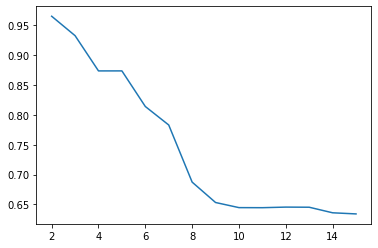

In [21]:
plt.plot(allclusters,allscore)

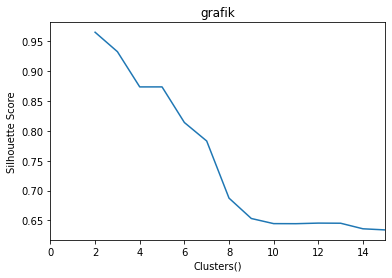

In [22]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhouette Score')
plt.title('grafik')
plt.xlim(0,15)
plt.show()

In [23]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
     for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(15)

Number of cluster2,silhouette0.9649282988190179
Number of cluster3,silhouette0.9463090269368797
Number of cluster4,silhouette0.8734641247895423
Number of cluster5,silhouette0.8734881735435334
Number of cluster6,silhouette0.814765903572538
Number of cluster7,silhouette0.7829640197864227
Number of cluster8,silhouette0.6828321515548245
Number of cluster9,silhouette0.6378165114303557
Number of cluster10,silhouette0.6447080549387083
Number of cluster11,silhouette0.643835985069352
Number of cluster12,silhouette0.6454793334453662
Number of cluster13,silhouette0.6361500727881957
Number of cluster14,silhouette0.6386913401562335
Number of cluster15,silhouette0.6402750560417411


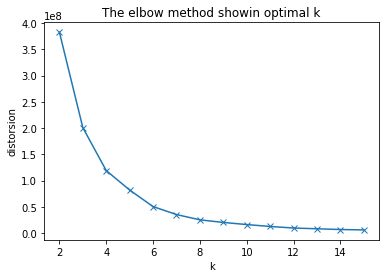

In [24]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('distorsion')
plt.title('The elbow method showin optimal k')
plt.show()